All imports:

In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

define helpful functions

In [3]:
def display_image(mat_like):
    plt.figure()
    plt.imshow(mat_like)
    plt.show()
    plt.close()

Load Image folders

In [4]:
current_folder = os.getcwd()
root_data_folder = os.path.join(current_folder, "local_data")
random_frames_folder = os.path.join(root_data_folder, "random_frames")
sequence_1_folder = os.path.join(root_data_folder, "sequence_1")
sequence_2_folder = os.path.join(root_data_folder, "sequence_2")
sequence_3_folder = os.path.join(root_data_folder, "sequence_3")
sequence_4_folder = os.path.join(root_data_folder, "sequence_4")

load one image for testing

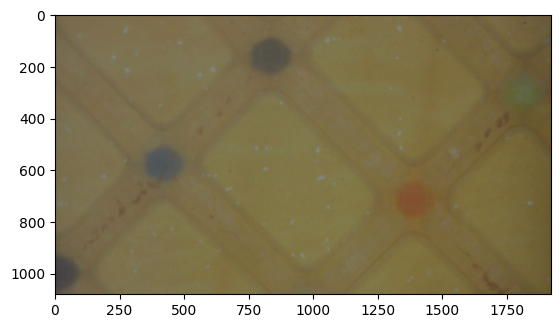

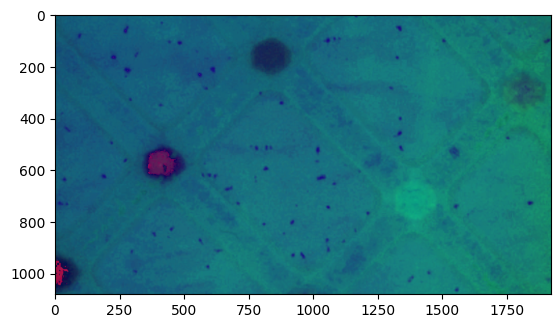

In [14]:
img_path = os.path.join(random_frames_folder, "random_003.jpg")

rnd_img = cv2.imread(img_path)
rnd_img_color = cv2.cvtColor(rnd_img, cv2.COLOR_BGR2RGB)
rnd_img_gray = cv2.cvtColor(rnd_img, cv2.COLOR_BGR2HSV)

display_image(rnd_img_color)

# rnd_img_gray = cv2.medianBlur(rnd_img_gray, 21)
# clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(7, 7))
# rnd_img_gray = clahe.apply(rnd_img_gray)

# rnd_img_gray = cv2.equalizeHist(rnd_img_gray)
# rnd_img_gray = cv2.medianBlur(rnd_img_gray, 21)
# rnd_img_gray = cv2.equalizeHist(rnd_img_gray)
# rnd_img_gray = cv2.medianBlur(rnd_img_gray, 21)

display_image(rnd_img_gray)

In [48]:
# circles = cv2.HoughCircles(
#     rnd_img_gray,
#     cv2.HOUGH_GRADIENT,
#     dp=1, # down sample size
#     minDist=40, # minimum distance between detected circles
#     param1=10,
#     param2=40,
#     minRadius=50,
#     maxRadius=90,
# )

# color_img_cpy = np.copy(rnd_img_color)
# circles = np.uint(np.around(circles))

# for circle in circles[0, :]:
#     x, y, r = circle[0], circle[1], circle[2]
#     cv2.circle(color_img_cpy, (x, y), r, (255, 255, 255), 5)

# display_image(color_img_cpy)

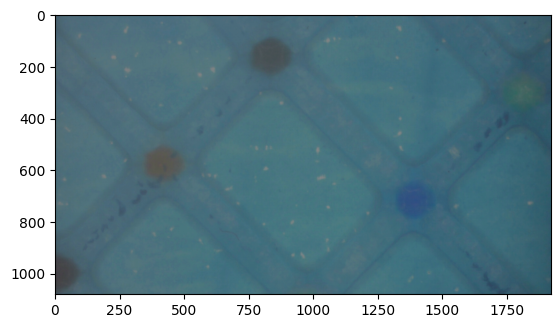

In [ ]:
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"לא נמצאה תמונה בנתיב: {img_path}")

# 2. המרת התמונה לגווני אפור
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. זיהוי קצוות עם Canny (ניתן לשחק עם הפרמטרים)
edges = cv2.Canny(gray, 20, 200)

# 4. מציאת קונטורים
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 5. יצירת מסכה ריקה בגודל התמונה
mask = np.ones_like(gray) * 255  # רקע לבן

# 6. ציור הקונטורים בזפת מלאה כדי לסמן אזורים לא רלוונטיים
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 500:  # פילטר לפי גודל (תלוי בגודל האזור הלא-רלוונטי)
        cv2.drawContours(mask, [contour], -1, 0, thickness=cv2.FILLED)  # מילוי בשחור

# 7. החלת המסכה על התמונה המקורית
img_cleaned = cv2.bitwise_and(img, img, mask=mask)

display_image(gray)
display_image(edges)
display_image(mask)
display_image(img_cleaned)
